In [ ]:
!pip install ucimlrepo

Jumlah baris data: 414
Jumlah kolom fitur: 6

CONTOH DATA (X)
   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  
0                               10     24.98298     121.54024  
1                                9     24.98034     121.53951  
2                                5     24.98746     121.54391  
3                                5     24.98746     121.54391  
4                                5     24.97937     121.54245  

CONTOH TARGET (y
   Y house price of unit area
0                        

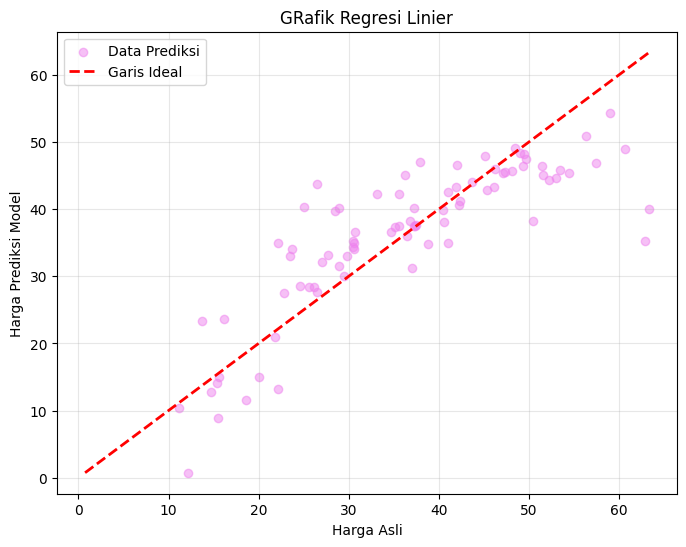


PERBANDINGAN NILAI ASLI VS PREDIKSI
   Harga Asli  Prediksi Model
0        45.1       47.886254
1        42.3       41.164046
2        52.2       44.273014
3        37.3       40.197615
4        22.8       27.513265


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
#scikitlearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#dataset
real_estate = fetch_ucirepo(id=477)

#fitur (x) target (y)
X = real_estate.data.features
y = real_estate.data.targets

print(f"Jumlah baris data: {X.shape[0]}")
print(f"Jumlah kolom fitur: {X.shape[1]}")

print("\nCONTOH DATA (X)")
print(X.head())
print("\nCONTOH TARGET (y")
print(y.head())

#split data | 80% train, 20 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData Training: {X_train.shape[0]} baris")
print(f"Data Testing: {X_test.shape[0]} baris")

#buatmodel linear regression
model = LinearRegression()

#training model
model.fit(X_train, y_train)

#prediksi
y_pred = model.predict(X_test)

#MSE
mse = mean_squared_error(y_test, y_pred)

print("\nHASIL EVALUASI MODEL")
print(f"Mean Squared Error: {mse:.4f}")

#scatter plot hasil
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='violet', alpha=0.5, label='Data Prediksi')

#garis refgerensi
min_val = min(y_test.values.min(), y_pred.min())
max_val = max(y_test.values.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Garis Ideal')

plt.xlabel('Harga Asli')
plt.ylabel('Harga Prediksi Model')
plt.title('GRafik Regresi Linier')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#perbandingan 5 data pertama
print("\nPERBANDINGAN NILAI ASLI VS PREDIKSI")
perbandingan = pd.DataFrame({
    'Harga Asli': y_test.values.flatten(),
    'Prediksi Model': y_pred.flatten()
})
print(perbandingan.head())